# Effectiveness of feedforward neural network for classifying images

In this project we will build a handwritten digits classifier using a K-Nearest Neighbors model and a Neural Network. The dataset that we will use is a pre-loaded dataset in Scikit-learn. In this project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

In [1]:
#import all packages we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

warnings.simplefilter(action='ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)

In [3]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
data = digits['data']
images = digits['images']
target = digits['target']
target_names = digits['target_names']

In [5]:
target = pd.Series(target)
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


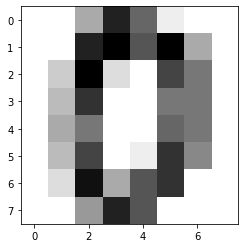

In [6]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8, 8)
plt.imshow(np_image, cmap='gray_r')

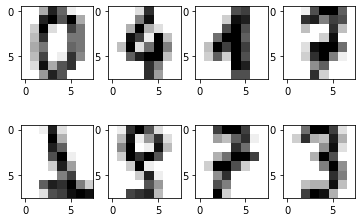

In [7]:
fig, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[100].values.reshape(8,8), cmap="gray_r")
axarr[0, 2].imshow(data.iloc[200].values.reshape(8,8), cmap="gray_r")
axarr[0, 3].imshow(data.iloc[300].values.reshape(8,8), cmap="gray_r")

axarr[1, 0].imshow(data.iloc[1000].values.reshape(8,8), cmap="gray_r")
axarr[1, 1].imshow(data.iloc[1100].values.reshape(8,8), cmap="gray_r")
axarr[1, 2].imshow(data.iloc[1200].values.reshape(8,8), cmap="gray_r")
axarr[1, 3].imshow(data.iloc[1300].values.reshape(8,8), cmap="gray_r")

## K-Nearest Neighbors

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. If you recall, k-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

In [8]:
def train_knn(neighbors, train_features, train_target):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(train_features, train_target)
    return knn

def test(model, test_features, test_target):
    #predict
    pred = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_target
    train_test_df['predicted_label'] = pred
    overall_accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label'])/len(train_test_df)
    return overall_accuracy
    
def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=42)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_knn(k, train_features, train_target)
        overall_accuracy = test(model, test_features, test_target)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

Text(0.5, 1.0, 'Mean accuracy Vs. K')

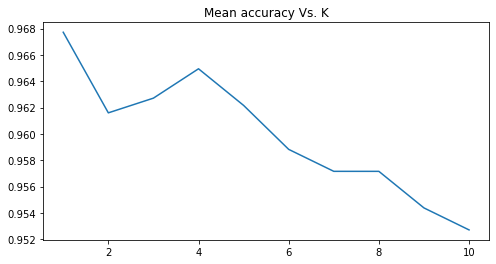

In [9]:
k_values = list(range(1,11))
k_accuracies = []

for k in k_values:
    k_accuracy = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracy)
    k_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.plot(k_values, k_accuracies)
plt.title("Mean accuracy Vs. K")

The accuracy of the model decrease with each new neighbor, there is a spike at 4 neighbors but still they are a bit lower than the accuracy with only one neighbor. The loss of accuracy isn't dramatic with a loss of only 0.006 points

## Neural Network with one hidden layer

There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

Let's now try a neural network with a single hidden layer. Use the MLPClassifier package from scikit-learn.

In [10]:
neurons = [8, 16, 32, 64, 128, 256]

mean_train_acc = []
mean_test_acc = []

for n in neurons:
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=42)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_target, test_target = target.iloc[train_index], target.iloc[test_index]

        mlp = MLPClassifier(hidden_layer_sizes=(n,), max_iter=1000)
        mlp.fit(train_features, train_target)
        
        #Train Accuracy
        pred = mlp.predict(train_features)
        train_acc = accuracy_score(train_target, pred)
        train_accuracies.append(train_acc)
        
        #Test Accuracy
        pred = mlp.predict(test_features)
        test_acc = accuracy_score(test_target, pred)
        test_accuracies.append(test_acc)
    
    mean_train_acc.append(np.mean(train_accuracies))
    mean_test_acc.append(np.mean(test_accuracies))

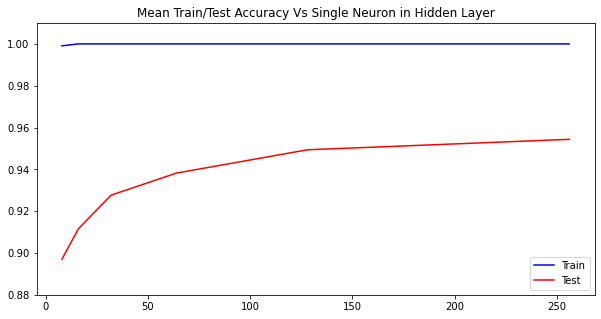

In [11]:
plt.figure(figsize=(10,5))
plt.title("Mean Train/Test Accuracy Vs Single Neuron in Hidden Layer")
x = [i for i in neurons]
plt.plot(x, mean_train_acc, color='blue')
plt.plot(x, mean_test_acc, color='red')
plt.ylim(0.88,1.01)
plt.legend(['Train', 'Test'])

In [12]:
print(mean_test_acc)

[0.8970366245978718, 0.9115169512496907, 0.9276503340757238, 0.9382195001237317, 0.9493553575847562, 0.9543553575847562]


The accuracy in the train portion hits 1 rapidly, meanwhile the test accuracy starts to increase with each neuron and we increase the accuracy from 0.88 (approx) to 0.96. The K-Nearest neighbors model got an accuracy of 0.96, wich means that there's an advantage to use a neural network to classify this dataset.

The only problem so far is that we don't have any information about true or false positives and true or false negatives.

## Neural Network with two hidden layers
Adding more neurons to a single hidden layer vastly improved the classification accuracy.
Let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [13]:
neurons = [ (64, 64), (128, 128), (256, 256)]

mean_train_acc = []
mean_test_acc = []

for n in neurons:
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=42)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_target, test_target = target.iloc[train_index], target.iloc[test_index]

        mlp = MLPClassifier(hidden_layer_sizes=n , max_iter=1000)
        mlp.fit(train_features, train_target)
        
        #Train Accuracy
        pred = mlp.predict(train_features)
        train_acc = accuracy_score(train_target, pred)
        train_accuracies.append(train_acc)
        
        #Test Accuracy
        pred = mlp.predict(test_features)
        test_acc = accuracy_score(test_target, pred)
        test_accuracies.append(test_acc)
    
    mean_train_acc.append(np.mean(train_accuracies))
    mean_test_acc.append(np.mean(test_accuracies))

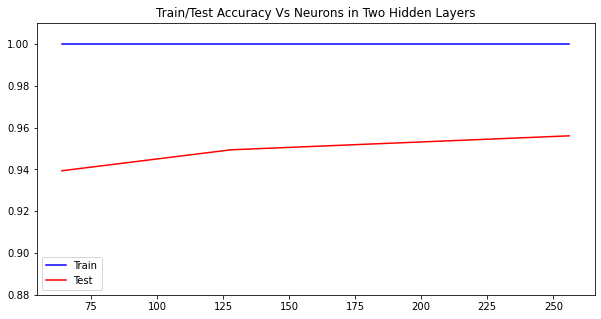

In [14]:
plt.figure(figsize=(10,5))
plt.title("Train/Test Accuracy Vs Neurons in Two Hidden Layers")
x = [i[0] for i in neurons]
plt.plot(x, mean_train_acc, color='blue')
plt.plot(x, mean_test_acc, color='red')
plt.ylim(0.88,1.01)
plt.legend(['Train', 'Test'])

In [15]:
print(mean_test_acc)

[0.9393318485523385, 0.9493528829497649, 0.9560331601088838]


With two hidden layers, the model gets an accuracy of 1 in the train portion with the first set of 64 neurons. Meanwhile the test portion increases from 0.94 to 0.96 wich is still a lower accuracy than K-Nearest Neighbors

## Neural Network with three hidden layers
Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

In [16]:
neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

mean_train_acc = []
mean_test_acc = []

for n in neurons:
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=42, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_target, test_target = target.iloc[train_index], target.iloc[test_index]

        mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=1000)
        mlp.fit(train_features, train_target)
        
        #Train Accuracy
        pred = mlp.predict(train_features)
        train_acc = accuracy_score(train_target, pred)
        train_accuracies.append(train_acc)
        
        #Test Accuracy
        pred = mlp.predict(test_features)
        test_acc = accuracy_score(test_target, pred)
        test_accuracies.append(test_acc)
    
    mean_train_acc.append(np.mean(train_accuracies))
    mean_test_acc.append(np.mean(test_accuracies))

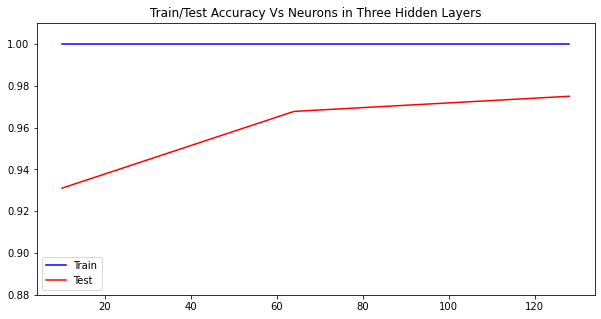

In [17]:
plt.figure(figsize=(10,5))
plt.title("Train/Test Accuracy Vs Neurons in Three Hidden Layers")
x = [i[0] for i in neurons]
plt.plot(x, mean_train_acc, color='blue')
plt.plot(x, mean_test_acc, color='red')
plt.ylim(0.88,1.01)
plt.legend(['Train', 'Test'])

In [18]:
print(mean_test_acc)

[0.931003464488988, 0.9677196238554814, 0.9749542192526602]


With three hidden layers the accuracy in the test portion increases from 0.94 to 0.975 approximately. This one has a better accuracy than K-Nearest Neighbors. This goes accodingly with the literature about computer vision, the theory says that with more layers the model will work better

In [54]:
values = [0.9677233358079684,0.9549133877753031,0.9577010640930462,0.9749542192526602]

models = ['K-Nearest Neighbors','Neural Network with one hidden layer','Neural Network with two hidden layers','Neural Network with three hidden layers']

In [55]:
max_value = max(values)
max_name = models[values.index(max(values))]

In [56]:
print("{} model performs the best with the value of {}.".format(max_name,max_value))

Neural Network with three hidden layers model performs the best with the value of 0.9749542192526602.


## Conclusion

Neural Network with three hidden layers model performs the best within our models. It improved the accuracy upto 0.975 which is higher than K-Nearest Neighbors. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance. 